In [1]:
import numpy as np
from IPython.core.display import display, HTML
from IPython.display import display
import ipywidgets as widgets
from string import Template
import json
from scipy import stats
from IPython.display import clear_output
import matplotlib
import cirrus
import os
import time

c = 10
from matplotlib import pyplot as plt

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.ion()
for i in range(20):
    x = range(i)
    y = range(i)
    # plt.gca().cla() # optionally clear axes
    plt.plot(x, y)
    plt.draw()
    time.sleep(1)
    # plt.pause(0.1)

plt.show(block=True) # block=True lets the window stay open at the end of the animation.

In [ ]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand

if 1:  # simple picking, lines, rectangles and text
    print("Hi")
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_title('click on points, rectangles or text', picker=True)
    ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
    line, = ax1.plot(rand(100), 'o', picker=5)  # 5 points tolerance

    # pick the rectangle
    bars = ax2.bar(range(10), rand(10), picker=True)
    for label in ax2.get_xticklabels():  # make the xtick labels pickable
        label.set_picker(True)

    def onpick1(event):
        print("Bye")
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            xdata = thisline.get_xdata()
            ydata = thisline.get_ydata()
            ind = event.ind
            print('onpick1 line:', zip(np.take(xdata, ind), np.take(ydata, ind)))
            c -= 1
        elif isinstance(event.artist, Rectangle):
            patch = event.artist
            print('onpick1 patch:', patch.get_path())
        elif isinstance(event.artist, Text):
            text = event.artist
            print('onpick1 text:', text.get_text())

    fig.canvas.mpl_connect('pick_event', onpick1)

In [ ]:
%matplotlib notebook
import matplotlib
print(matplotlib.get_backend())

In [ ]:
%matplotlib notebook
%matplotlib notebook

import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
x = np.arange(0)

for z in range(0, 100):
    ax.clear()
    x = np.arange(z)
    y = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
    x += 4
    z = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
    ax.plot(y)
    ax.plot(z)
    fig.canvas.draw()
    # time.sleep(1)


<IPython.core.display.Javascript object>


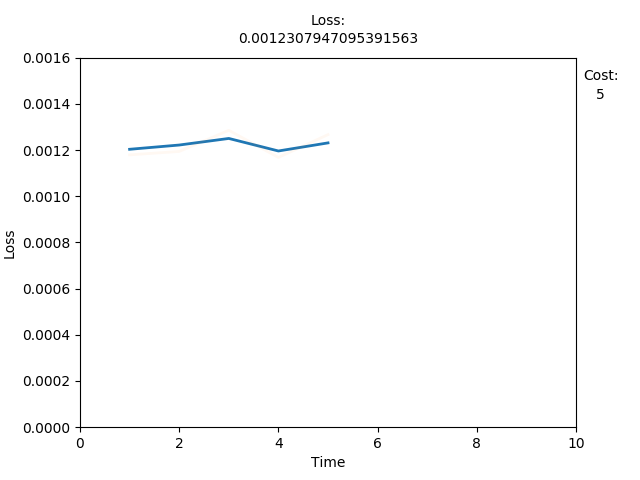

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib notebook
%matplotlib notebook

import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
from matplotlib.widgets import CheckButtons
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import random

# Defining the initial plot and lines
fig, ax = plt.subplots()
plt.xlabel('Time')
# ax.grid()

# Graph options initialisation
matplotlib.rcParams['toolbar'] = 'None'
NUM_LINES = 2
PERFORMING = 1
dropdown = ['Loss v. Time', 'Updates v. Second']
dropdown_value = 'Loss v. Time'
radio = ['All lines', 'Top ten performing lines', 'Bottom ten performing lines']
radio_value = 'Loss v. Time'

# Defining the cost
cost = ax.text(1.05, .95,'Cost:',horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
cost_val = ax.text(1.05, .90,0,horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)

loss_text = ax.text(.5, 1.1,'Loss:',horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)
loss_val = ax.text(.5, 1.05,0,horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)

loss_text.set_text(str())
loss_val.set_text(str())

# Loss v. Time
lines = [ax.plot([], [], lw=2, picker=2)[0] for _ in range(NUM_LINES)]
line_x = []
lines_y = [[] for _ in range(NUM_LINES)]
alphas_y = [1] * NUM_LINES
l_max = .00160
r_max = 10

#Updates per Second
update_line, = ax.plot([], [], lw=2)
update_y = []
u_min = 96
u_max = 100

# public booleans
isPickEvent = False
lineSelected = [False, -1]

# Delete button
button = widgets.Button(description='Delete', layout=widgets.Layout(width='50px', height='25px'))

# Define line selectable methods
def onpick(event):
    global isPickEvent, lineSelected
    isPickEvent = True
    lineSelected[0] = True
    if isinstance(event.artist, matplotlib.lines.Line2D):
        ind = lines.index(event.artist)
        lineSelected[1] = ind
        for i in range(NUM_LINES):
            if lines[i].get_alpha() != 0:
                lines[i].set_alpha(.05)
            alphas_y[i] = .05
        lines[ind].set_alpha(1)
        alphas_y[ind] = 1

def onpick2(event):
    global isPickEvent, lineSelected
    if isPickEvent == True:
        isPickEvent = False
    else:
        lineSelected[0] = False
        lineSelected[1] = -1
        for i in range(NUM_LINES):
            if lines[i].get_alpha() != 0:
                lines[i].set_alpha(1)
                alphas_y[i] = 1

def button_clicked(event):
    global NUM_LINES, lines, lines_y
    index = lineSelected[1]
    # lines[index].set_data([], [])
    NUM_LINES -= 1
    del lines[index]
    del lines_y[index]
    lineSelected[0] = False
    lineSelected[1] = -1
    for i in range(NUM_LINES):
        if lines[i].get_alpha() != 0:
            lines[i].set_alpha(1)
            alphas_y[i] = 1
    dropdown_lines(dropdown_value)
    radio_lines(radio_value)
                
# Fake data
def updates_per_second(t):
    return t + random.randint(-2, 2)

# Fake data
def data_gen(t=0):
    cnt = 0
    while cnt <= 1000:
        t += 1
        cnt += 1
        x = np.array([cnt])
        d = []
        for _ in range(NUM_LINES):
            x += random.randint(-4, 4)
            y = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
            d.append(y[0])
        # time.sleep(1)
        yield t, d

def dropdown_lines(x):
    global dropdown_value
    if x == 'Loss v. Time':
        fig.canvas.set_window_title('Loss v. Time')
        plt.ylabel('Loss')
        ax.set_ylim(0, l_max)
        radio_lines(radio_value)
        update_line.set_alpha(0)
        
    if x == 'Updates v. Second':
        fig.canvas.set_window_title('Updates per Second')
        plt.ylabel('Updates')
        ax.set_ylim(u_min, u_max)
        for i in range(NUM_LINES):
            lines[i].set_alpha(0)
        update_line.set_alpha(1)
        radio_lines(radio_value)
        
    dropdown_value = x

def radio_lines(x):
    global radio_value, c
    if dropdown_value != 'Updates v. Second':
        if x == 'All lines':
            for i in range(NUM_LINES):
                lines[i].set_alpha(alphas_y[i])
        elif x == 'Top ten performing lines':
            for i in range(NUM_LINES):
                lines[i].set_alpha(0)
            copy = np.array(lines_y)
            indices = copy[:, -1].argsort()[:PERFORMING]
            for index in indices:
                lines[index].set_alpha(alphas_y[index])
        elif x == 'Bottom ten performing lines':
            for i in range(NUM_LINES):
                lines[i].set_alpha(0)
            copy = np.array(lines_y)
            indices = copy[:, -1].argsort()[-PERFORMING:]
            for index in indices:
                lines[index].set_alpha(alphas_y[index])
    radio_value = x

def init():
    fig.canvas.set_window_title('Loss v. Time')
    plt.ylabel('Loss')
    
    ax.set_ylim(0, l_max)
    ax.set_xlim(0, r_max)
    
    button.on_click(button_clicked)
    
    del line_x[:]
    for line in lines_y:
        del line[:]
    del update_y[:]
    for i in range(NUM_LINES):
        lines[i].set_data(line_x, lines_y[i])
    update_line.set_data(line_x, update_y)
    update_line.set_alpha(0)
    for i in range(NUM_LINES):
        alphas_y[i] = lines[i].get_alpha()
    
    return lines

def run(data):
    # Save the axes limits of updates per second, loss v. time
    global l_max, r_max, u_min, u_max
    
    # Update global axis limits
    xmin, xmax = ax.get_xlim()
    r_max = xmax
    ymin, ymax = ax.get_ylim()
    
    t, y = data
    line_x.append(t)
    for i in range(NUM_LINES):
        lines_y[i].append(y[i])
        if y[i] > l_max:
            l_max = y[i]
    
    
    # change to reflect updating model
    update_y.append(updates_per_second(98))
    
    if t >= xmax:
        r_max *= 2
        ax.set_xlim(xmin, 2 * xmax)
        ax.figure.canvas.draw()

    for i in range(NUM_LINES):
        lines[i].set_data(line_x, lines_y[i])
    
    update_line.set_data(line_x, update_y)

    cost_val.set_text(str(t))
    dropdown_lines(dropdown_value)
    radio_lines(radio_value)
    
    if lineSelected[0]:
        loss_text.set_text("Loss:")
        loss_val.set_text(lines_y[lineSelected[1]][-1])
        button.layout.visibility = 'visible'
    else:
        button.layout.visibility = 'hidden'
        loss_text.set_text(str())
        loss_val.set_text(str())
        
    return tuple(lines)

fig.canvas.mpl_connect('pick_event', onpick)
fig.canvas.mpl_connect('button_press_event', onpick2)
interact(dropdown_lines, x=dropdown)
ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000, repeat=False, init_func=init)
interact(radio_lines, x=radio)
display(button)
plt.show()

In [17]:
c

-100

In [19]:
b = widgets.Button(description='Delete',
           layout=widgets.Layout(width='50px', height='25px'))
c = 100
def click(b):
    global c
    print(dir(b))
b.on_click(click)
display(b)

Widget Javascript not detected.  It may not be installed or enabled properly.


['__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_notifiers', '_call_widget_constructed', '_click_handlers', '_comm_changed', '_compare', '_config_changed', '_cross_validation_lock', '_default_keys', '_default_layout', '_default_style', '_display_callbacks', '_dom_classes', '_find_my_config', '_handle_button_msg', '_handle_custom_msg', '_handle_displayed', '_handle_msg', '_holding_sync', '_ipython_display_', '_is_numpy', '_load_config', '_lock_property', '_log_default', '_model_id', '_model_module', '_model_module_version', '_model_name', '_msg_callbacks', '_notify_trait', '_property_lock', '_register_validator', '_remove_notifiers', '_send', '_sho

In [ ]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plt
import matplotlib.animation as animation

npdata = numpy.random.randint(100, size=(5,6,10))
plotlays, plotcols = [2,5], ["black","red"]

fig = plt.figure()
ax = plt.axes(xlim=(0, numpy.shape(npdata)[0]), ylim=(0, numpy.max(npdata)))
timetext = ax.text(0.5,50,'')

lines = []
for index,lay in enumerate(plotlays):
    lobj = ax.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)

def init():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(i):
    # timetext.set_text(i)
    x = numpy.array(range(1,npdata.shape[0]+1))
    for lnum,line in enumerate(lines):
        line.set_data(x,npdata[:,plotlays[lnum]-1,i])
    return tuple(lines)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=numpy.shape(npdata)[1], interval=100, blit=True)

plt.show()

In [ ]:
lines_y

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

NUM_LINES = 2

def data_gen(t=0):
    cnt = 0
    while cnt <= 1000:
        t += 1
        cnt += 1
        x = np.array([cnt])
        y = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
        x += 4
        # time.sleep(1)
        yield t, y[0]

def init():
    ax.set_ylim(0, .00140)
    ax.set_xlim(0, 10)
    del line_x[:]
    line.set_data(line_x, line_y)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
line_x = []
line_y = []

def run(data):
    print("Hi")
    # update the data
    t, y = data
    line_x.append(t)
    line_y.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
        
    line.set_data(line_x, line_y)
    
    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

In [ ]:
import numpy as np
x = np.array([10])
y = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
y

In [ ]:
x = np.arange(3)
x

In [ ]:
def progress_callback(time_loss, cost, task):
  print("Current training loss:", time_loss, \
        "current cost ($): ", cost)

data_bucket = 'cirrus-criteo-kaggle-19b-random'
model = 'model_v1'

lr_task = cirrus.LogisticRegression(
             # number of workers
             n_workers = 1,
             # number of parameter servers
             n_ps = 1,
             # worker size in MB
             worker_size = 128,
             # path to s3 bucket with input dataset
             dataset = data_bucket,
             # sgd update LR and epsilon
             learning_rate=0.01,
             epsilon=0.0001,
             progress_callback = progress_callback,
             # stop workload after these many seconds
             timeout = 0,
             # stop workload once we reach this loss
             threshold_loss=0,
             # resume execution from model stored in this s3 bucket
             resume_model = model,
             # ip where ps lives
             ps_ip_public='128.32.112.46',
             # username of VM
             ps_username='ubuntu',
             # choose between adagrad, sgd, nesterov, momentum
             opt_method = 'adagrad',
             # checkpoint model every x secs
             checkpoint_model = 60,
             minibatch_size=20,
             # model size
             model_bits=19,
             # whether to filter gradient weights
             use_grad_threshold=False,
             # threshold value
             grad_threshold=0.001,
             # range of training minibatches
             train_set=(0,824),
             # range of testing minibatches
             test_set=(835,840),
             )

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand

if 1:  # simple picking, lines, rectangles and text
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_title('click on points, rectangles or text', picker=True)
    ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
    line, = ax1.plot(rand(100), 'o', picker=5)  # 5 points tolerance

    # pick the rectangle
    bars = ax2.bar(range(10), rand(10), picker=True)
    for label in ax2.get_xticklabels():  # make the xtick labels pickable
        label.set_picker(True)

    def onpick1(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            xdata = thisline.get_xdata()
            ydata = thisline.get_ydata()
            ind = event.ind
            print('onpick1 line:', zip(np.take(xdata, ind), np.take(ydata, ind)))
        elif isinstance(event.artist, Rectangle):
            patch = event.artist
            print('onpick1 patch:', patch.get_path())
        elif isinstance(event.artist, Text):
            text = event.artist
            print('onpick1 text:', text.get_text())

    fig.canvas.mpl_connect('pick_event', onpick1)

if 1:  # picking with a custom hit test function
    # you can define custom pickers by setting picker to a callable
    # function.  The function has the signature
    #
    #  hit, props = func(artist, mouseevent)
    #
    # to determine the hit test.  if the mouse event is over the artist,
    # return hit=True and props is a dictionary of
    # properties you want added to the PickEvent attributes

    def line_picker(line, mouseevent):
        """
        find the points within a certain distance from the mouseclick in
        data coords and attach some extra attributes, pickx and picky
        which are the data points that were picked
        """
        if mouseevent.xdata is None:
            return False, dict()
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        maxd = 0.05
        d = np.sqrt((xdata - mouseevent.xdata)**2. + (ydata - mouseevent.ydata)**2.)

        ind = np.nonzero(np.less_equal(d, maxd))
        if len(ind):
            pickx = np.take(xdata, ind)
            picky = np.take(ydata, ind)
            props = dict(ind=ind, pickx=pickx, picky=picky)
            return True, props
        else:
            return False, dict()

    def onpick2(event):
        print('onpick2 line:', event.pickx, event.picky)

    fig, ax = plt.subplots()
    ax.set_title('custom picker for line data')
    line, = ax.plot(rand(100), rand(100), 'o', picker=line_picker)
    fig.canvas.mpl_connect('pick_event', onpick2)


if 1:  # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)

    def onpick3(event):
        ind = event.ind
        print('onpick3 scatter:', ind, np.take(x, ind), np.take(y, ind))

    fig, ax = plt.subplots()
    col = ax.scatter(x, y, 100*s, c, picker=True)
    #fig.savefig('pscoll.eps')
    fig.canvas.mpl_connect('pick_event', onpick3)

if 1:  # picking images (matplotlib.image.AxesImage)
    fig, ax = plt.subplots()
    im1 = ax.imshow(rand(10, 5), extent=(1, 2, 1, 2), picker=True)
    im2 = ax.imshow(rand(5, 10), extent=(3, 4, 1, 2), picker=True)
    im3 = ax.imshow(rand(20, 25), extent=(1, 2, 3, 4), picker=True)
    im4 = ax.imshow(rand(30, 12), extent=(3, 4, 3, 4), picker=True)
    ax.axis([0, 5, 0, 5])

    def onpick4(event):
        artist = event.artist
        if isinstance(artist, AxesImage):
            im = artist
            A = im.get_array()
            print('onpick4 image', A.shape)

    fig.canvas.mpl_connect('pick_event', onpick4)


plt.show()

In [ ]:
a

In [ ]:
%%px --targets 1

model2.fit(X_train, Y_train,
          epochs=3,
          validation_data=(X_test, Y_test),
          callbacks=[plot, csv_logger],
          verbose=0)

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, color='red', label='1 HZ')
line2, = ax.plot(t, y2, lw=2, color='blue', label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [ ]:
from IPython.html import widgets
from IPython.utils.traitlets import Unicode


class CircleView(widgets.DOMWidget):
    _view_name = Unicode('CircleView', sync=True)

    def __init__(self, *pargs, **kwargs):
        widgets.DOMWidget.__init__(self, *pargs, **kwargs)
        self._handlers = widgets.CallbackDispatcher()
        self.on_msg(self._handle_my_msg)

    def _ipython_display_(self, *pargs, **kwargs):
        widgets.DOMWidget._ipython_display_(self, *pargs, **kwargs)

    def _handle_my_msg(self, _, content):
        """handle a message from the frontent"""
        if content.get('event', '') == 'mouseover':
            self._handlers(self)

    def on_mouseover(self, callback):
        """Register a callback at mouseover"""
        self._handlers.register_callback(callback)

In [ ]:
%%javascript

require(["//cdnjs.cloudflare.com/ajax/libs/d3/3.4.1/d3.min.js",
         "widgets/js/widget"], function(d3, WidgetManager){

  var CircleView = IPython.DOMWidgetView.extend({

    render: function(){
            this.guid = 'circle' + IPython.utils.uuid();
            this.setElement($('<div />', {id: this.guid}));
            
            this.model.on('msg:custom', this.on_msg, this);
            this.has_drawn = false;

            // Wait for element to be added to the DOM
            var that = this;
            setTimeout(function() {
                that.update();
            }, 0);
    },

    update: function(){
        var that = this;

        if (!this.has_drawn) {
           this.has_drawn = true;

           this.svg = d3.select("#" + this.guid).append("svg")
               .attr("width", 200)
               .attr("height", 200);

           this.circle = this.svg.append("circle")
                    .attr("cx", 100)
                    .attr("cy", 100)
                    .attr("r", 20)
                    .style("fill", "red")
                    .style("fill-opacity", 0.5)
                    .on("mouseenter", function(){that.send({event:'mouseover'})});
       }
       return CircleView.__super__.update.apply(this);
    },

    on_msg: function(attrs){
        this.circle.transition().attr(attrs).style(attrs);
    }
  });
  WidgetManager.register_widget_view('CircleView', CircleView);
})

In [ ]:
from random import randint

colors = ['blue', 'green', 'orange', 'black', 'magenta', 'red']

def update_circle(view):
    view.send({"cx": randint(30, 170),
               "cy": randint(30, 170),
               "r": randint(10, 30),
               "fill": colors[randint(0, 5)]})

circle = CircleView()
circle.on_mouseover(update_circle)

print("Try to catch the circle!")
display(circle)

In [ ]:
plot_losses

In [ ]:
y

In [ ]:
%matplotlib notebook

"""
Enable picking on the legend to toggle the original line on and off
"""
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, color='red', label='1 HZ')
line2, = ax.plot(t, y2, lw=2, color='blue', label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)


# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [ ]:
matplotlib

<IPython.core.display.Javascript object>


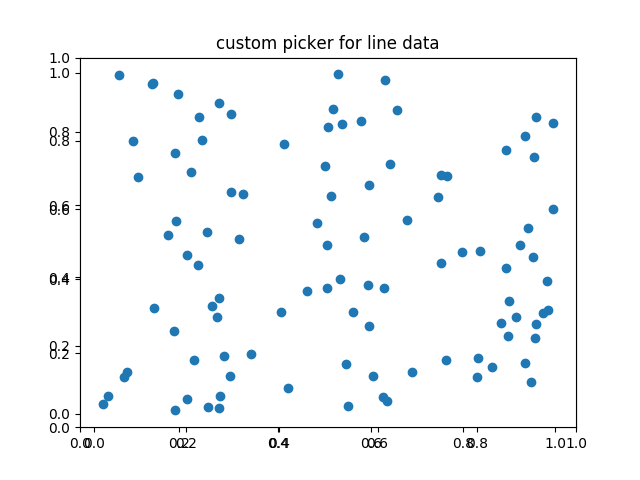

7

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand
c = 100
def line_picker(line, mouseevent):
        """
        find the points within a certain distance from the mouseclick in
        data coords and attach some extra attributes, pickx and picky
        which are the data points that were picked
        """
        if mouseevent.xdata is None:
            return False, dict()
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        maxd = 0.05
        d = np.sqrt((xdata - mouseevent.xdata)**2. + (ydata - mouseevent.ydata)**2.)

        ind = np.nonzero(np.less_equal(d, maxd))
        if len(ind):
            pickx = np.take(xdata, ind)
            picky = np.take(ydata, ind)
            props = dict(ind=ind, pickx=pickx, picky=picky)
            return True, props
        else:
            return False, dict()
        
def onpick2(event):
    c -= 10
    print('onpick2 line:', event.pickx, event.picky)
        
fig, ax = plt.subplots()
ax1 = fig.add_subplot(111)
ax1.set_title('custom picker for line data')
line, = ax1.plot(rand(100), rand(100), 'o', picker=line_picker)
fig.canvas.mpl_connect('pick_event', onpick2)

In [2]:
c

100